# K-MEANS
- Garantiza la convergencia
- Sensible a la asignación inicial de las medias
- Minimiza las diferencias cuadraticas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(13,7)
plt.style.use('ggplot')

In [ ]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
#centroide, al azar
C = np.array([[8,10],[3,10.5]])

In [ ]:
#distancia
np.sqrt((C[0][0]-C[1][0])**2+(C[0][1]-C[1][1])**2)

5.024937810560445

In [ ]:
#norma
np.linalg.norm(C[0]-C[1])

5.024937810560445

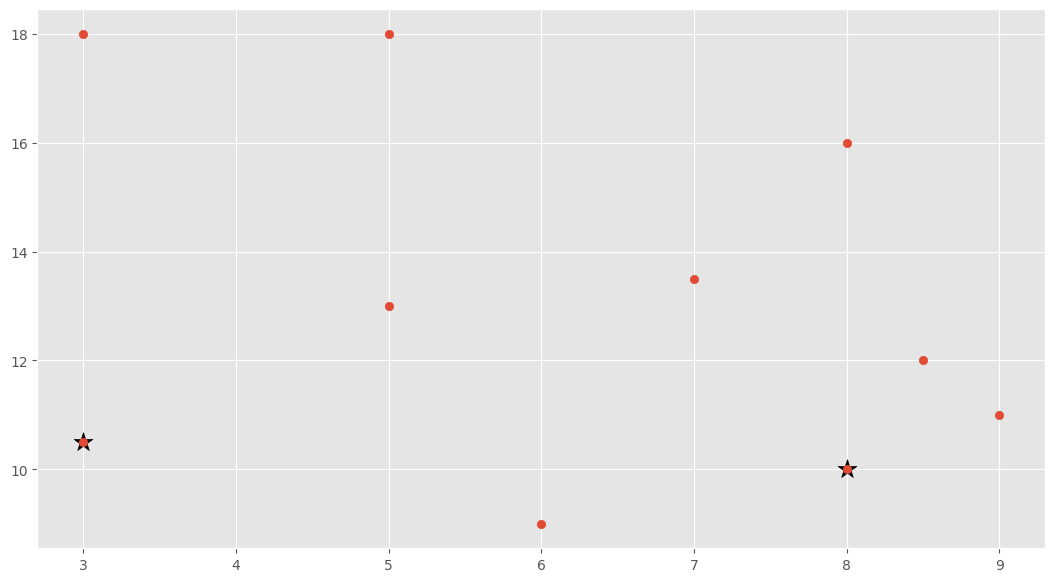

In [ ]:
#Grafica
plt.scatter(C[:,0],C[:,1],marker='*',s=200,c='k')
plt.scatter(data[:,0],data[:,1])

In [ ]:
distances = []
clusters= []
def dist(a,b,ax=1):
  return np.linalg.norm(a-b,axis=ax)

for i in range(len(data)):
  distances.append(dist(data[i],C))
  clusters.append(np.argmin(distances[i]))

print(f'{clusters}: \n {np.array(distances)}')

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0]: 
 [[0.         5.02493781]
 [5.02493781 0.        ]
 [3.64005494 5.        ]
 [8.54400375 7.76208735]
 [4.24264069 3.20156212]
 [2.23606798 3.35410197]
 [1.41421356 6.02079729]
 [9.43398113 7.5       ]
 [2.06155281 5.70087713]
 [6.         7.43303437]]


In [ ]:
# Recalcular los centroides
for i in range(len(C)):
  points = np.array([data[j] for j in range(len(data)) if clusters[j]==i])
  print(points)
  C[i]=np.mean(points,axis=0)
C

[[ 8.  10. ]
 [ 7.  13.5]
 [ 6.   9. ]
 [ 9.  11. ]
 [ 8.5 12. ]
 [ 8.  16. ]]
[[ 3.  10.5]
 [ 5.  18. ]
 [ 5.  13. ]
 [ 3.  18. ]]


array([[ 7.75      , 11.91666667],
       [ 4.        , 14.875     ]])

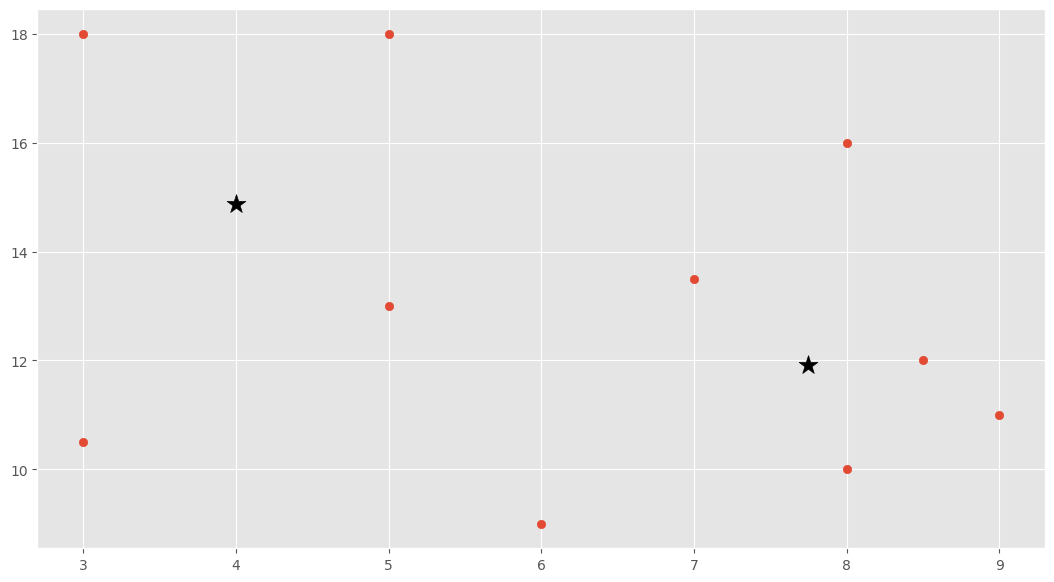

In [ ]:
#Grafica
plt.scatter(C[:,0],C[:,1],marker='*',s=200,c='k')
plt.scatter(data[:,0],data[:,1])

In [ ]:
# ScikitLearn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(13,7)
plt.style.use('ggplot')

In [ ]:
#datos
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/cluster/xclara.csv'
data = pd.read_csv(url)
data.head()

,rownames,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


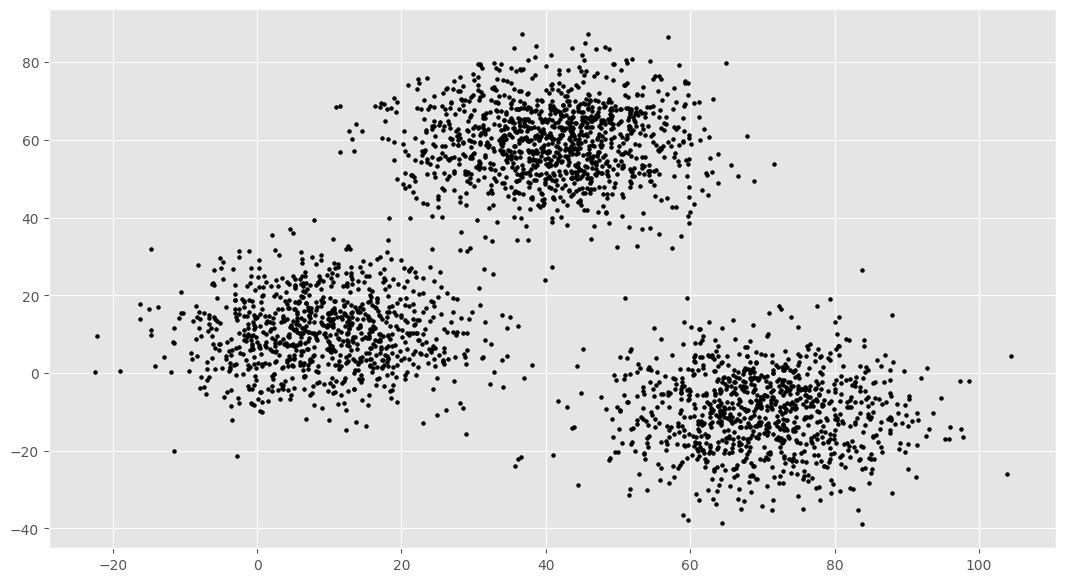

In [ ]:
#EDA
v1,v2=data['V1'].values,data['V2'].values
plt.scatter(v1,v2,c='black',s=7)
plt.show()

In [ ]:
#pegar datos en una sola matriz
X = np.array(list(zip(v1,v2)))
km = KMeans(n_clusters=3,n_init='auto') #n_init, numero de inicializaciones
#inercia, suma de cuadrados dentro de cada grupo
km = km.fit(X)
y_hat=km.predict(X)
C=km.cluster_centers_

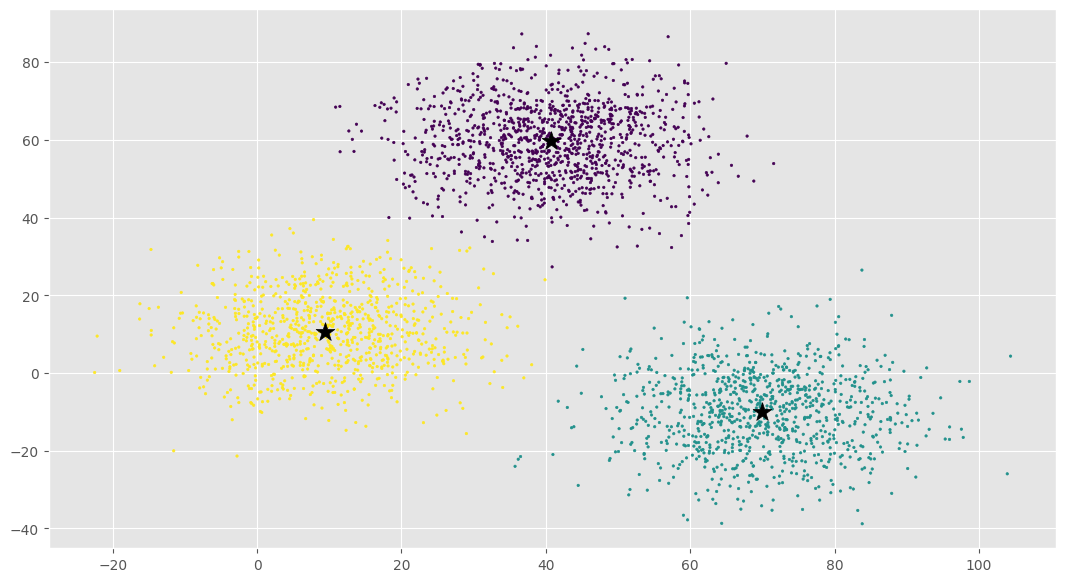

In [ ]:

plt.scatter(X[:,0],X[:,1],c=y_hat,s=3)
plt.scatter(C[:,0],C[:,1],c='k',s=200,marker='*')

In [ ]:
#Determinar el numero de grupos: Grafica del codo
import seaborn as sns
sns.set()

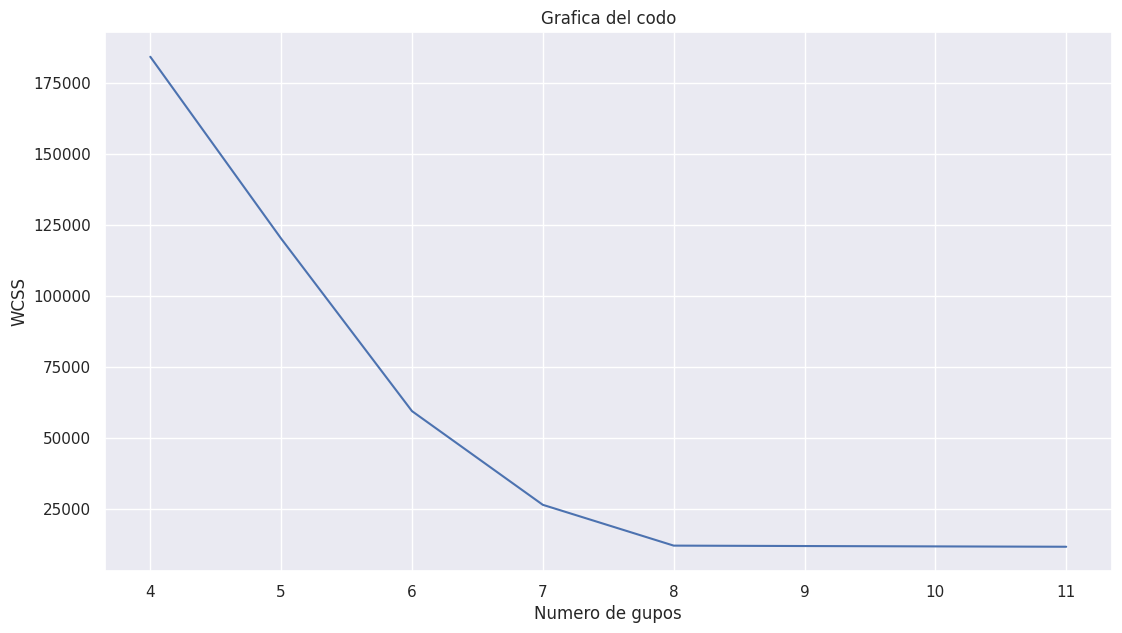

In [ ]:
#Desde cero
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#numero de grupos 8 con 12 caracteristicas
X,_=make_blobs(n_samples=1000,n_features=12,centers=8,random_state=42)
#Buscar numero optimo de grupos
wcss=[] #Within  Cluster Sum of Squeares (Inercia)
for i in range(4,12):
  km=KMeans(n_clusters=i, init='k-means++',n_init='auto',random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
#Grafica
plt.plot(range(4,12),wcss)# numero de grupos y lista de suma de cuadrados
plt.title('Grafica del codo')
plt.xlabel('Numero de gupos')
plt.ylabel('WCSS')
plt.show()

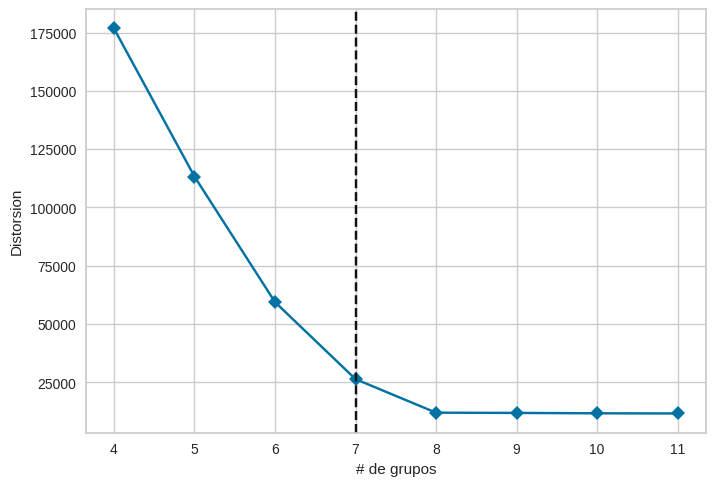

In [ ]:
#Modo  BootCamp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
X,_=make_blobs(n_samples=1000,n_features=12,centers=8,random_state=42)
#Grafica
vis=KElbowVisualizer(KMeans(n_init='auto'),k=(4,12),timings=False) #timings, te muestra o no te muestra los tiempos de ejecucion para cada grupo
vis.fit(X)
plt.xlabel('# de grupos')
plt.ylabel('Distorsion')
plt.show()
#Recomendacion, no resolucion definitiva

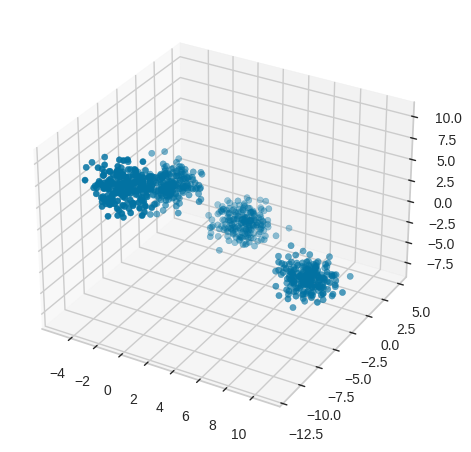

In [ ]:
# 3D
from mpl_toolkits.mplot3d import Axes3D
X,_y=make_blobs(n_samples=800,n_features=3,centers=4)
fig=plt.figure()
#ax=Axes3D(fig)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.show()

In [ ]:
km = KMeans(n_clusters=4,n_init='auto')
km=km.fit(X)
y_hat=km.fit(X)
C=km.cluster_centers_
C

array([[ 0.8860139 ,  2.29156911, -4.66122796],
       [-1.58236696, -9.53680518,  7.07225947],
       [-2.32131889, -2.25077118,  1.81072583],
       [ 8.11290636, -1.58353109, -5.25427286]])

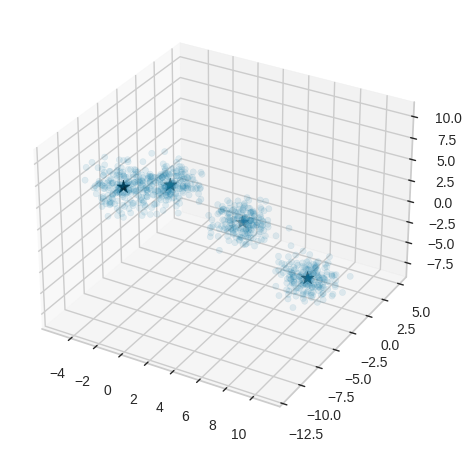

In [ ]:
# 3D
#from mpl_toolkits.mplot3d import Axes3D
#X,_y=make_blobs(n_samples=800,n_features=3,centers=4)
fig=plt.figure()
#ax=Axes3D(fig)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],alpha=0.1)
ax.scatter(C[:,0],C[:,1],C[:,2],s=100,marker='*',c='k')
plt.show()

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks_v1/05.11-K-Means.ipynb

Clasificar las muestras siguientes utilizando k=2 :
[1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13], [6, 9], [8, 10], [9, 11],
[8.5, 12], [7, 13.5], [8, 16], [0.5, 10.5]

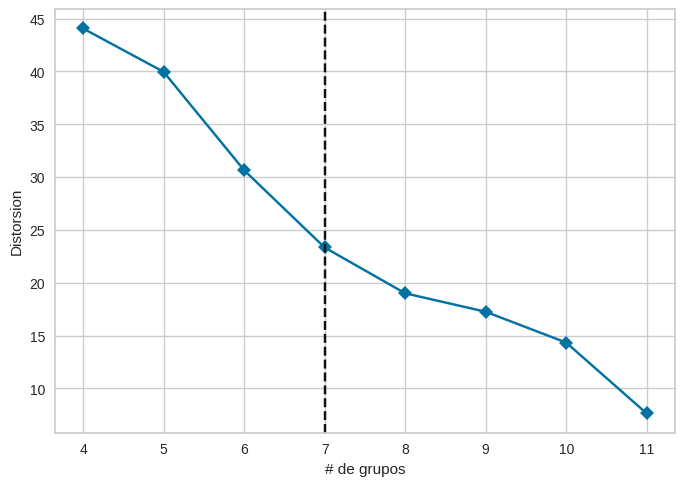

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
data = np.array([[1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13], [6, 9], [8, 10], [9, 11],
[8.5, 12], [7, 13.5], [8, 16], [0.5, 10.5]])

#Grafica
vis=KElbowVisualizer(KMeans(n_init='auto'),k=(4,12),timings=False) #timings, te muestra o no te muestra los tiempos de ejecucion para cada grupo
vis.fit(data)
plt.xlabel('# de grupos')
plt.ylabel('Distorsion')
plt.show()


In [ ]:
km = KMeans(n_clusters=7,n_init='auto') #n_init, numero de inicializaciones
#inercia, suma de cuadrados dentro de cada grupo
km = km.fit(data)
y_hat=km.predict(data)
C=km.cluster_centers_


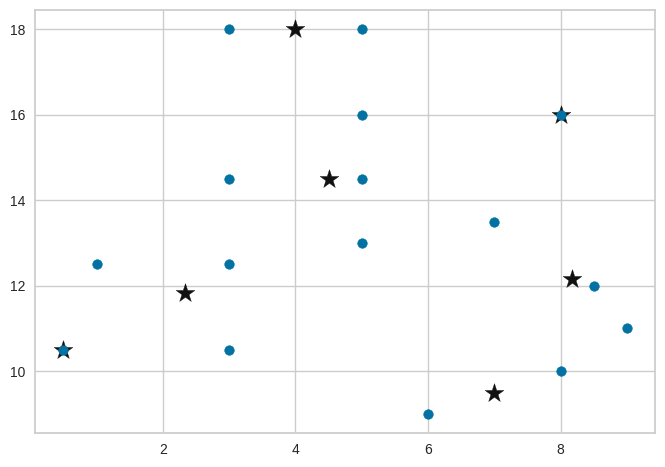

In [ ]:
#plt.scatter(data[:,0],data[:,1],c=y_hat,s=3)
plt.scatter(C[:,0],C[:,1],c='k',s=200,marker='*')
plt.scatter(data[:,0],data[:,1])

In [ ]:
#kmodas categorias son texto

import numpy as np
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])
modes = np.array([['x','y','z'],
                  ['z','y','x']
                  ])
data.shape

(8, 3)

In [ ]:
#Asignar muestras a grupos
clusters = np.zeros(data.shape[0])
clusters
distances = []
for i, object in enumerate(data):
  dist =[sum(object !=mode) for mode in modes]
  distances.append(dist)
  clusters[i]=np.argmin(dist)
print(clusters)
distances

[0. 1. 1. 0. 0. 1. 0. 1.]


[[0, 2], [3, 2], [3, 1], [2, 3], [2, 3], [2, 0], [2, 3], [2, 0]]

In [ ]:
#Actualizamos modas
for i in range(len(modes)):
  points=np.array([data[j] for j in range(len(data)) if clusters[j]==i])
  print(points) # que puntos del conjunto pertenecen a cada clase
  for h in range(modes.shape[1]):
    vals,counts = np.unique(points[:,h],return_counts=True)
    modes[i][h] = vals[np.argmax(counts)] #indice del valor maximo de las modas
modes

[['x' 'y' 'z']
 ['y' 'z' 'z']
 ['x' 'z' 'y']
 ['x' 'x' 'y']]
[['y' 'z' 'x']
 ['z' 'x' 'x']
 ['z' 'y' 'x']
 ['z' 'y' 'x']]


array([['x', 'z', 'y'],
       ['z', 'y', 'x']], dtype='<U1')

## K-modas

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [ ]:
col_cabello = np.array (['rubio','castaño','pelirrojo','negro','castaño','rubio','negro','negro'])
col_ojos = np.array (['azul','gris','verde','café','azul','gris','azul','azul'])
tipo_cabello = np.array (['lacio','chino','ondulado','ondulado','chino','chino','lacio','ondulado'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame ({'person':personas ,'col_cabello': col_cabello ,'col_ojos':col_ojos})
data = data.set_index ('person')

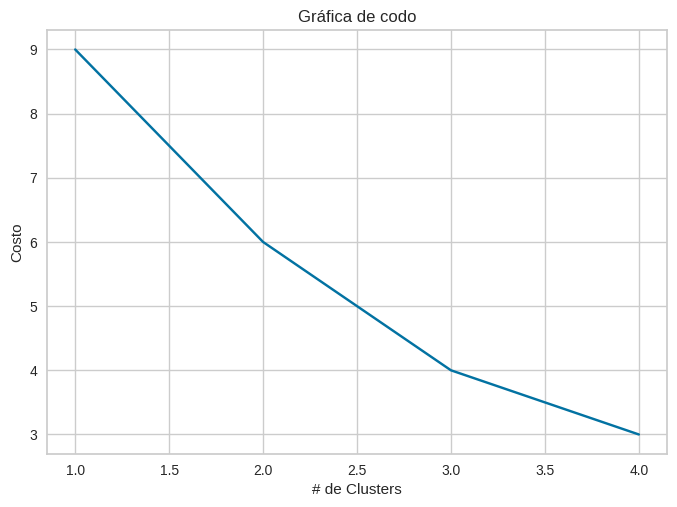

In [ ]:
cost = []
K = range(1, 5)

for nc in K:
    kmode = KModes(n_clusters=nc, init="random", n_init=5, verbose=0)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Costo')
plt.title('Gráfica de codo')
plt.show()


In [ ]:
kmode = KModes(n_clusters=3, init="random", n_init=5, verbose=0)
clusters = kmode.fit_predict(data)

data['Cluster'] = clusters

print(data)

       col_cabello col_ojos  Cluster
person                              
P1           rubio     azul        2
P2         castaño     gris        0
P3       pelirrojo    verde        0
P4           negro     café        1
P5         castaño     azul        0
P6           rubio     gris        0
P7           negro     azul        2
P8           negro     azul        2


## Agrega al conjunto de datos una columna continua, como estatura y/o peso e ingresa los valores correspondientes. Despues genera los rasgos para obtener categorias y obten los nuevos grupos generados con esas categorias

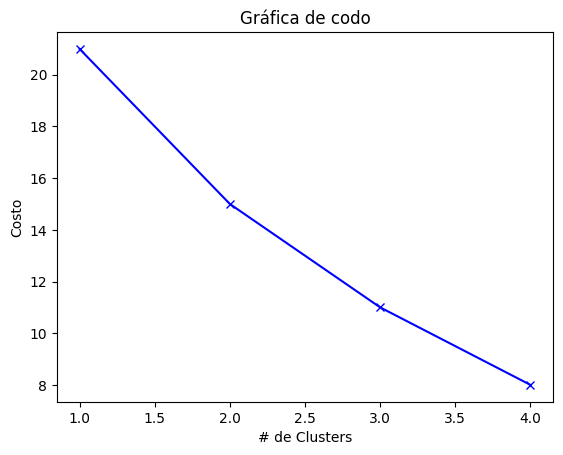

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'rubio', 'negro', 'negro'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'azul'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'lacio', 'ondulado'])

estatura = np.array([170, 165, 180, 175, 160, 155, 185, 178])


personas = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
data = pd.DataFrame({
    'person': personas,
    'col_cabello': col_cabello,
    'col_ojos': col_ojos,
    'tipo_cabello': tipo_cabello,
    'estatura': estatura
})
data = data.set_index('person')

data_encoded = data.copy()
data_encoded[['col_cabello', 'col_ojos', 'tipo_cabello']] = data[['col_cabello', 'col_ojos', 'tipo_cabello']].apply(lambda x: pd.factorize(x)[0])

cost = []
K = range(1, 5)

for num_clusters in K:
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0)
    kmode.fit_predict(data_encoded)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Costo')
plt.title('Gráfica de codo')
plt.show()




In [ ]:
kmode = KModes(n_clusters=2, init="random", n_init=5, verbose=0)
clusters = kmode.fit_predict(data_encoded)

data['Cluster'] = clusters

print(data)

       col_cabello col_ojos tipo_cabello  estatura  Cluster
person                                                     
P1           rubio     azul        lacio       170        0
P2         castaño     gris        chino       165        0
P3       pelirrojo    verde     ondulado       180        1
P4           negro     café     ondulado       175        1
P5         castaño     azul        chino       160        0
P6           rubio     gris        chino       155        0
P7           negro     azul        lacio       185        1
P8           negro     azul     ondulado       178        1
